In [6]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.interpolate import interp1d	
from logistics_2 import run_simulation
from logistics_exact_cavity import two_modes_cavity
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['font.size'] = 14  

1. consistency check, ¿me he equivocado? usar el Rabi model para comparar 
2. probar formas de solucionar la inestabilidad 

	2.1 deshacer RWA 

	2.2 porbar alternativas algebraicas 

	2.3 Introducir leakege ($\eta$ )

# 1. Consistency check. 

first, let me use the code I already have and check that everything is consistent. 

In [ ]:
gamma = 0.02
tau = 1 
phi = 0.87*np.pi
Omega = gamma
t_max = 200*tau
dt = tau/150

omega_1 = 0
omega_2 = 2*np.pi
g = np.sqrt(gamma/tau)

t,e,_,_,_,_= run_simulation(gamma,tau,phi,Omega,t_max,dt,[0,1])

In [ ]:
exact3=two_modes_cavity(phi/tau,omega_1,omega_2, g,g,Omega,phi/tau,3,start_ground=True)
pe3,m1,m2=exact3.evolve(t)

In [43]:
exact5=two_modes_cavity(phi/tau,omega_1,omega_2, g,g,Omega,phi/tau,5,start_ground=True)
pe5,m1,m2=exact5.evolve(t)

In [44]:
exact7=two_modes_cavity(phi/tau,omega_1,omega_2, g,g,Omega,phi/tau,7,start_ground=True)
pe7,_,_=exact7.evolve(t)

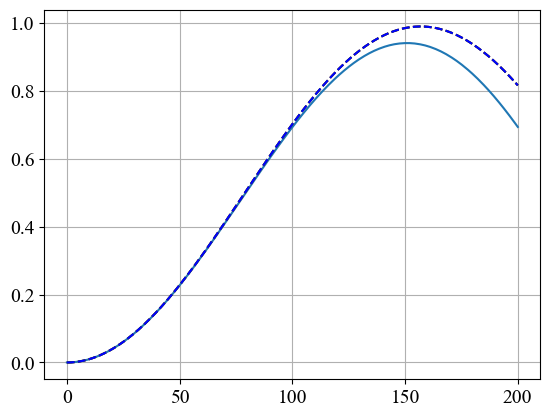

In [46]:
plt.plot(t/tau,e)
plt.plot(t/tau,pe3,'r--')
plt.plot(t/tau,pe5,'g--')
plt.plot(t/tau,pe7,'b--')
plt.grid()
plt.show()

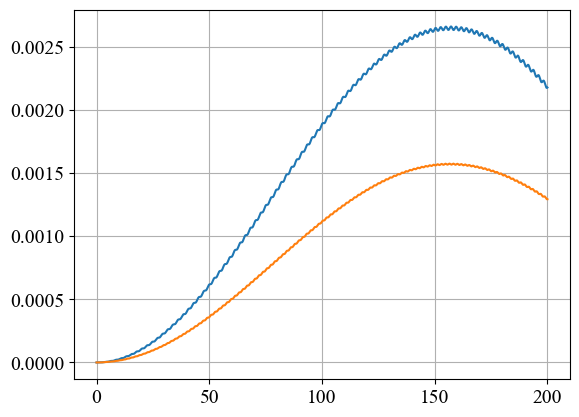

In [49]:
plt.plot(t,m1)
plt.plot(t,m2)
plt.grid()

maybe I am wrong, but I think the number of photons is always the same, you just filter in either of the modes 

In [77]:
phi1 = 0.3*np.pi 
phi2 = 0.6*np.pi 
phi3 = 1.3*np.pi 
phi4 = 1.6*np.pi 

omega_1 = 0
omega_2 = 2*np.pi
g = np.sqrt(gamma/tau)

In [78]:
exact1=two_modes_cavity(phi1/tau,omega_1,omega_2, g,g,Omega,phi1/tau,5,start_ground=True)
pe1,m11,m21=exact1.evolve(t)

exact2=two_modes_cavity(phi2/tau,omega_1,omega_2, g,g,Omega,phi2/tau,5,start_ground=True)
pe2,m12,m22=exact2.evolve(t)

exact3=two_modes_cavity(phi3/tau,omega_1,omega_2, g,g,Omega,phi3/tau,5,start_ground=True)
pe3,m13,m23=exact3.evolve(t)

exact4=two_modes_cavity(phi4/tau,omega_1,omega_2, g,g,Omega,phi4/tau,5,start_ground=True)
pe4,m14,m24=exact4.evolve(t)

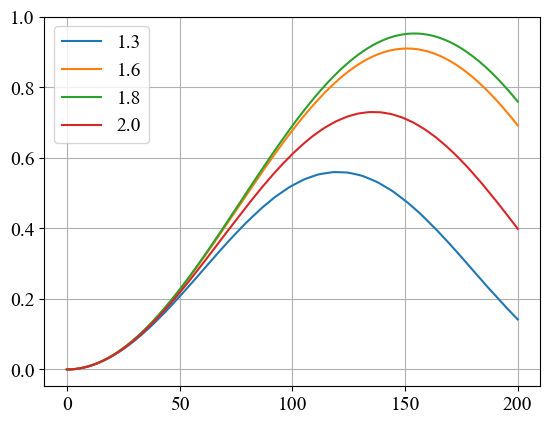

In [80]:
plt.plot(t,pe1,label='1.3')
plt.plot(t,pe2,label='1.6')
plt.plot(t,pe3,label='1.8')
plt.plot(t,pe4,label='2.0')
plt.legend()
plt.grid()

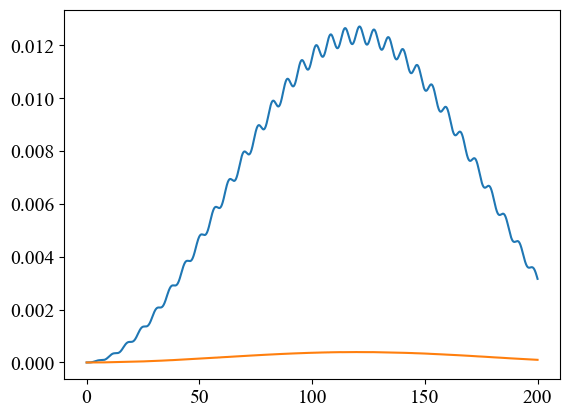

In [61]:
plt.plot(t,m11)
plt.plot(t,m21)
